In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats




# Load the data
file_path = 'Assignment_DataScientist_20250502.csv'
df = pd.read_csv(file_path)

In [4]:
# Aggregate duplicates by Experiment and Fruit nr (mean for spectra and targets)
group_cols = ['Experiment', 'Fruit nr']
spectral_cols = df.columns[:112]
meta_cols = ['sensorT', 'Size', 'Weight', 'Brix', 'TA', 'Firmness (kg)']
df_agg = df.groupby(group_cols).agg({**{col: 'mean' for col in spectral_cols},
                                     **{col: 'first' for col in meta_cols}}).reset_index()
print("Aggregated shape:", df_agg.shape)



Aggregated shape: (900, 120)


In [ ]:

# # Null Handling and Outlier Removal
# Drop rows with nulls and remove outliers from each target using a Z-score threshold.


# Drop nulls
df_clean = df_agg.dropna().copy()

# Remove outliers based on Z-score for targets
for target in ['Brix', 'TA', 'Firmness (kg)']:
    z_scores = np.abs(stats.zscore(df_clean[target]))
    df_clean = df_clean[z_scores < 3]

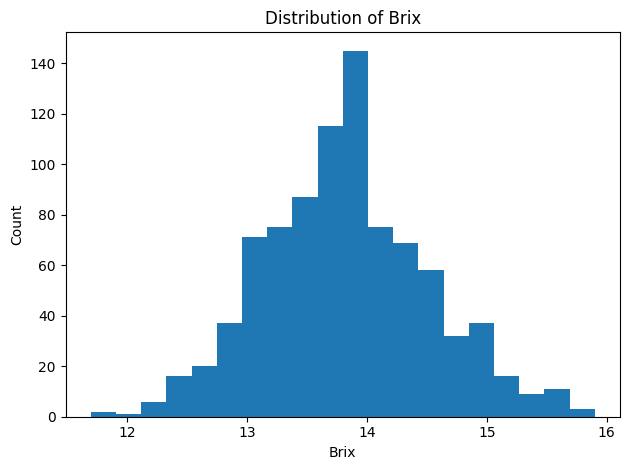

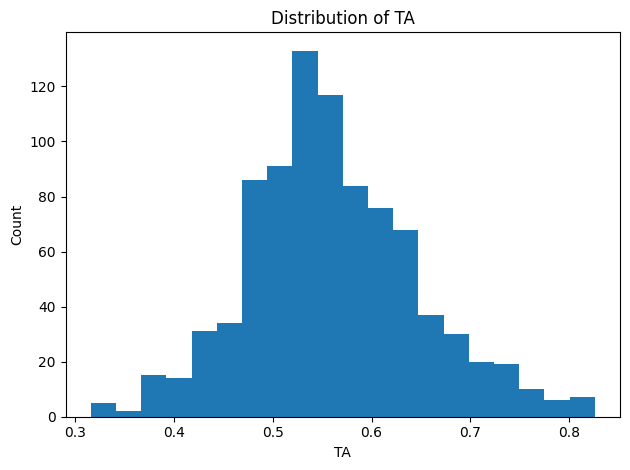

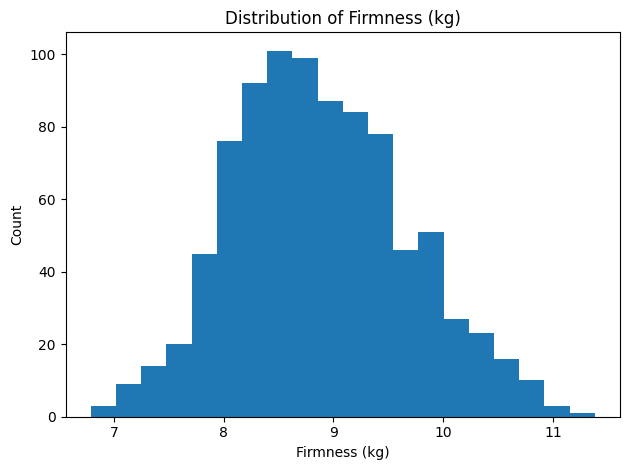

In [ ]:

# # Target Distribution
# Plot histograms for each target to inspect their distributions.


targets = ['Brix', 'TA', 'Firmness (kg)']
for target in targets:
    plt.figure()
    plt.hist(df_clean[target], bins=20)
    plt.title(f'Distribution of {target}')
    plt.xlabel(target)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [ ]:

all_cols = list(spectral_cols) + targets


corr_df = df_clean[all_cols].corr().loc[spectral_cols, targets]



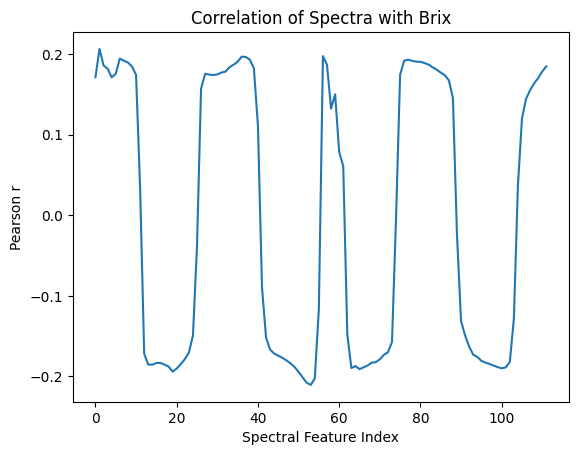

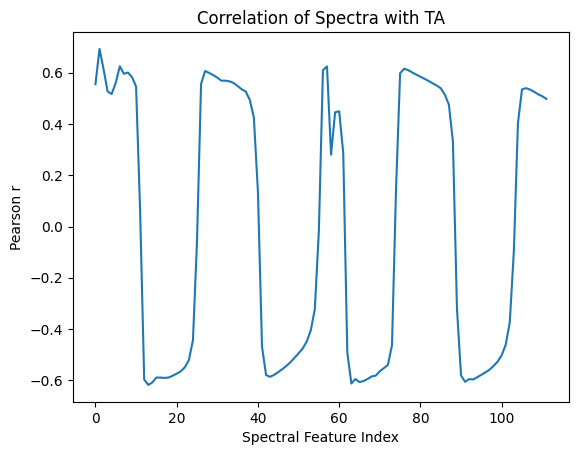

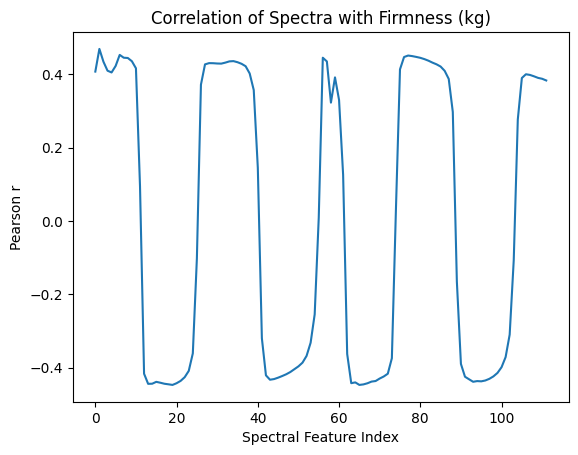

In [13]:
for tgt in targets:
    plt.figure()
    plt.plot(corr_df[tgt].values)
    plt.title(f'Correlation of Spectra with {tgt}')
    plt.xlabel('Spectral Feature Index')
    plt.ylabel('Pearson r')
    plt.show()


In [14]:
def top_features(corr_series, top_n=10):
    s = corr_series.sort_values()
    return pd.concat([s.tail(top_n).iloc[::-1], s.head(top_n)])

for tgt in targets:
    print(f"Top features for {tgt}:")
    print(top_features(corr_df[tgt], top_n=10))


Top features for Brix:
0.5_GHz_real      0.206371
0.25_GHz_imag     0.197377
9.25_GHz_real     0.196754
9.5_GHz_real      0.196337
1.75_GHz_real     0.194378
9.75_GHz_real     0.193074
5.5_GHz_imag      0.193055
5.25_GHz_imag     0.191805
2.0_GHz_real      0.191747
5.75_GHz_imag     0.191513
13.5_GHz_real    -0.210611
13.25_GHz_real   -0.207876
13.75_GHz_real   -0.202600
13.0_GHz_real    -0.201227
12.75_GHz_real   -0.194431
5.0_GHz_real     -0.194080
2.5_GHz_imag     -0.190982
5.25_GHz_real    -0.190357
11.25_GHz_imag   -0.189984
2.0_GHz_imag     -0.189674
Name: Brix, dtype: float64
Top features for TA:
0.5_GHz_real     0.692605
1.75_GHz_real    0.625059
0.5_GHz_imag     0.624238
5.25_GHz_imag    0.615372
0.75_GHz_real    0.613491
0.25_GHz_imag    0.609850
5.5_GHz_imag     0.609740
7.0_GHz_real     0.606543
5.75_GHz_imag    0.600518
2.25_GHz_real    0.600424
3.5_GHz_real    -0.617864
2.0_GHz_imag    -0.612316
3.75_GHz_real   -0.608259
2.5_GHz_imag    -0.606883
9.0_GHz_imag    -0.605634

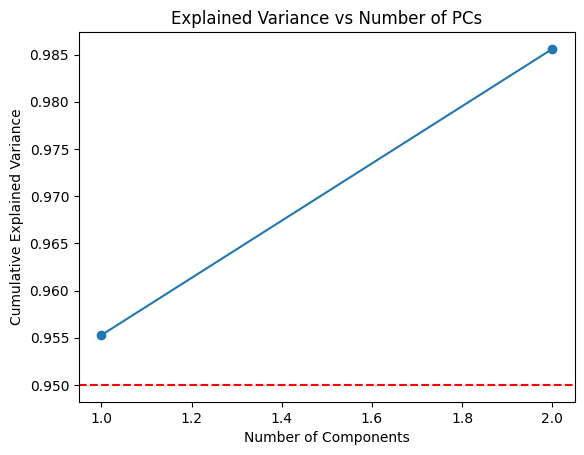

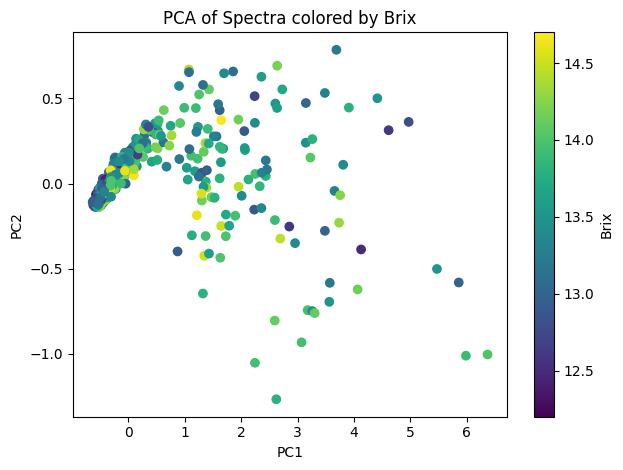

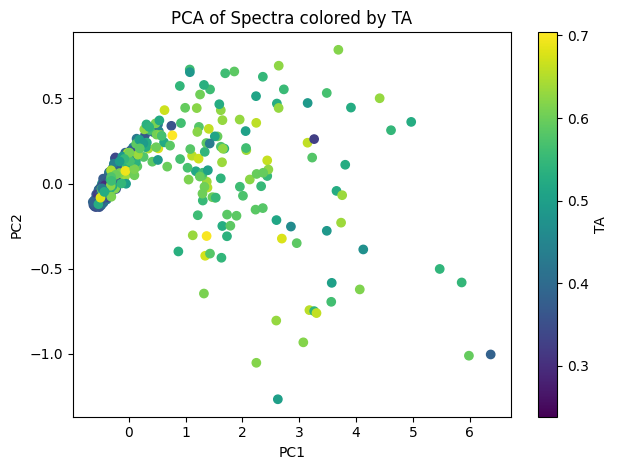

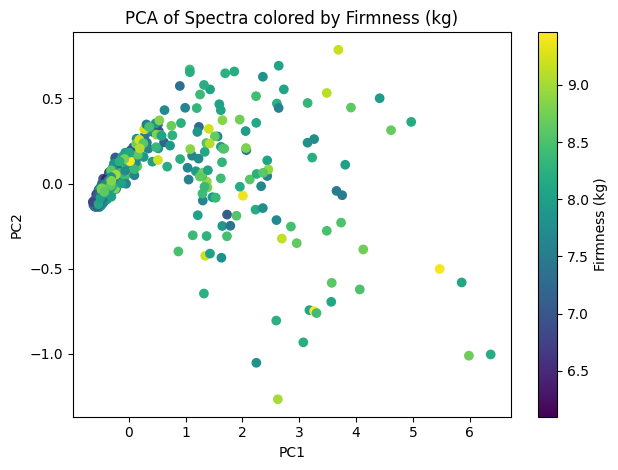

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# Perform PCA on the cleaned spectral data and visualize the first two principal components,
# coloring points by each target attribute.


# Load the cleaned data from previous steps
file_path = 'Assignment_DataScientist_20250502.csv'
df = pd.read_csv(file_path)


group_cols = ['Experiment', 'Fruit nr']
spectral_cols = df.columns[:112]
targets = ['Brix', 'TA', 'Firmness (kg)']

df_agg = df.groupby(group_cols).agg(
    {**{col: 'mean' for col in spectral_cols},
     **{col: 'mean' for col in targets}}
).reset_index()


from scipy import stats
df_clean = df_agg.dropna(subset=list(spectral_cols) + targets)
for tgt in targets:
    df_clean = df_clean[abs(stats.zscore(df_clean[tgt])) < 3]


X = df_clean[spectral_cols].values

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Explained variance ratio for each PC
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cum_variance = explained_variance.cumsum()

# Plot it
plt.plot(range(1, len(cum_variance)+1), cum_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of PCs')
plt.show()

# Add PCA results back to DataFrame
df_clean['PC1'] = X_pca[:, 0]
df_clean['PC2'] = X_pca[:, 1]


# ## Scatter Plots of PC1 vs. PC2 colored by each target


for tgt in targets:
    plt.figure()
    plt.scatter(df_clean['PC1'], df_clean['PC2'], c=df_clean[tgt])
    plt.title(f'PCA of Spectra colored by {tgt}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar(label=tgt)
    plt.tight_layout()
    plt.show()


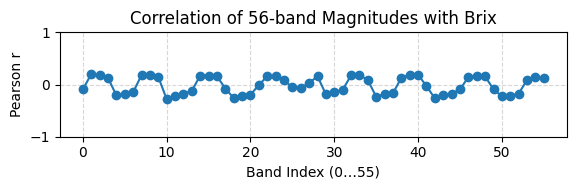

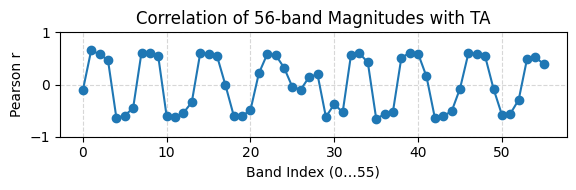

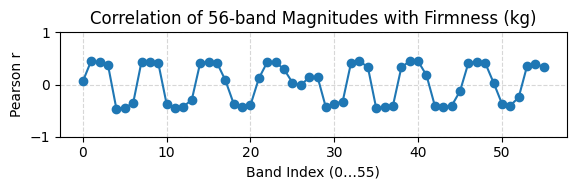

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1) Load & aggregate exactly as before
file_path = 'Assignment_DataScientist_20250502.csv'
df = pd.read_csv(file_path)

group_cols = ['Experiment', 'Fruit nr']
spectral_cols = df.columns[:112]  # real0, imag0, real1, imag1, ...
targets      = ['Brix', 'TA', 'Firmness (kg)']

df_agg = df.groupby(group_cols).agg(
    {**{col: 'mean' for col in spectral_cols},
     **{col: 'mean' for col in targets}}
).reset_index()

# 2) Clean NaNs and outliers
all_cols = list(spectral_cols) + targets
df_clean = df_agg.dropna(subset=all_cols)
for tgt in targets:
    df_clean = df_clean[np.abs(stats.zscore(df_clean[tgt])) < 3]

# 3) Compute 56 magnitude bands
mag_cols = []
for i in range(56):
    real_c = df_clean.columns[2*i]     # e.g. '0.25_GHz_real'
    imag_c = df_clean.columns[2*i + 1] # e.g. '0.25_GHz_imag'
    mag = np.sqrt(df_clean[real_c]**2 + df_clean[imag_c]**2)
    mag_name = f'band_{i}_mag'
    df_clean[mag_name] = mag
    mag_cols.append(mag_name)

# 4) Compute correlation
corr_df = df_clean[mag_cols + targets].corr().loc[mag_cols, targets]

# 5) Plot each target’s correlation curve
for tgt in targets:
    plt.figure(figsize=(6,2))
    plt.plot(corr_df[tgt].values, marker='o', linestyle='-')
    plt.title(f'Correlation of 56-band Magnitudes with {tgt}')
    plt.xlabel('Band Index (0…55)')
    plt.ylabel('Pearson r')
    plt.ylim(-1,1)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


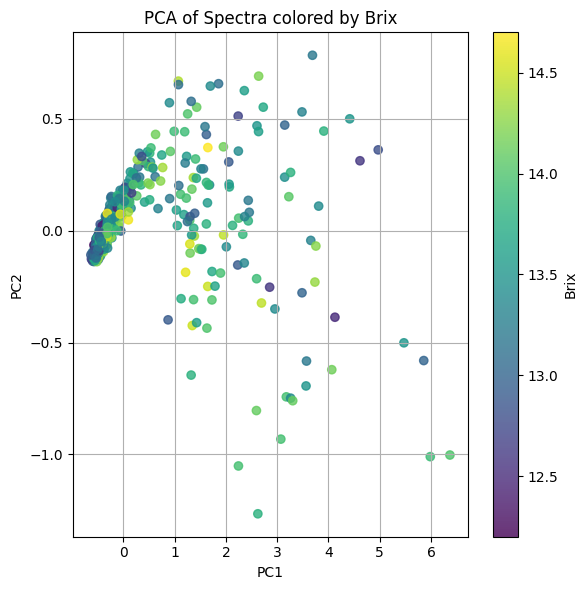

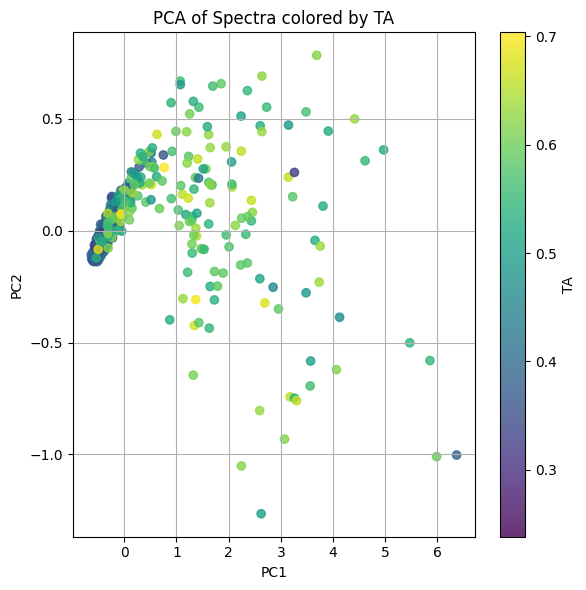

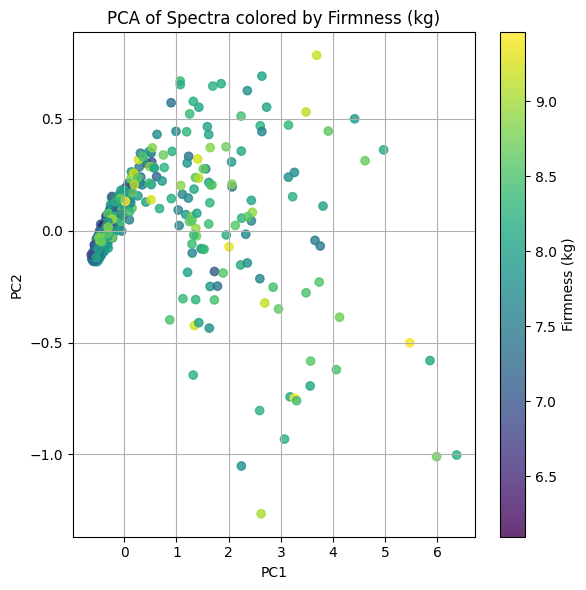

In [ ]:
# %% [markdown]
# # PCA of Spectral Data Colored by Each Target
# This notebook cell loads and cleans the data (aggregate duplicates, drop nulls, remove outliers),
# performs PCA on the spectra, and then produces three scatter plots of PC1 vs. PC2 colored by Brix, TA, and Firmness.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

# %% [markdown]
# ## 1. Load & Aggregate Duplicates

# %%
# Adjust file path if needed
df = pd.read_csv('Assignment_DataScientist_20250502.csv')

# Identify columns
spectral_cols = df.columns[:112]
targets       = ['Brix', 'TA', 'Firmness (kg)']
group_cols    = ['Experiment', 'Fruit nr']

# Aggregate duplicate scans by mean
df_agg = df.groupby(group_cols).agg(
    { **{col: 'mean' for col in spectral_cols},
      **{tgt: 'mean' for tgt in targets} }
).reset_index()

# %% [markdown]
# ## 2. Drop Nulls & Remove Outliers

# %%
# Drop any rows with missing spectral values or targets
df_clean = df_agg.dropna(subset=list(spectral_cols) + targets).copy()

# Remove samples whose target values lie >3σ from the mean
for tgt in targets:
    z = np.abs(stats.zscore(df_clean[tgt]))
    df_clean = df_clean[z < 3]

# %% [markdown]
# ## 3. Perform PCA

# %%
X = df_clean[spectral_cols].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Attach PCs back to the DataFrame
df_clean['PC1'] = X_pca[:, 0]
df_clean['PC2'] = X_pca[:, 1]

# %% [markdown]
# ## 4. Scatter Plots Colored by Each Target

# %%
for tgt in targets:
    plt.figure(figsize=(6, 6))
    sc = plt.scatter(
        df_clean['PC1'], df_clean['PC2'],
        c=df_clean[tgt],
        cmap='viridis',
        alpha=0.8
    )
    plt.title(f'PCA of Spectra colored by {tgt}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    cbar = plt.colorbar(sc)
    cbar.set_label(tgt)
    plt.grid(True)
    plt.tight_layout()
    plt.show()







In [7]:
# %% [markdown]
# # PCA per Target-specific Cleaning & Explained Variance
# For each target (Brix, TA, Firmness), this cell:
# 1. Aggregates duplicates
# 2. Drops nulls
# 3. Removes outliers based on that target's Z-score
# 4. Performs PCA on the cleaned spectra
# 5. Prints the explained variance ratios

# %%
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA

# Load raw data
df = pd.read_csv('Assignment_DataScientist_20250502.csv')
spectral_cols = df.columns[:112]
targets       = ['Brix', 'TA', 'Firmness (kg)']
group_cols    = ['Experiment', 'Fruit nr']

# Pre-aggregate duplicates once
df_agg = df.groupby(group_cols).agg(
    {**{col: 'mean' for col in spectral_cols},
     **{tgt: 'mean' for tgt in targets}}
).reset_index()

# Loop over each target
for tgt in targets:
    # 1) Copy the aggregated DataFrame
    df_temp = df_agg.copy()
    
    # 2) Drop rows with missing spectra or the current target
    df_temp = df_temp.dropna(subset=list(spectral_cols) + [tgt])
    
    # 3) Remove outliers based on this target's Z-score
    z = np.abs(stats.zscore(df_temp[tgt]))
    df_temp = df_temp[z < 3]
    
    # 4) Perform PCA on the cleaned spectral matrix
    X = df_temp[spectral_cols].values
    pca = PCA(n_components=min(10, X.shape[1]))  # e.g. first 10 components or fewer
    pca.fit(X)
    
    # 5) Report explained variance ratios
    evr = pca.explained_variance_ratio_
    cum_evr = np.cumsum(evr)
    print(f"\n=== PCA on spectra cleaned for target: {tgt} ===")
    for i, (r, cr) in enumerate(zip(evr, cum_evr), start=1):
        print(f"PC{i}:  variance_ratio = {r:.3f}, cumulative = {cr:.3f}")



=== PCA on spectra cleaned for target: Brix ===
PC1:  variance_ratio = 0.956, cumulative = 0.956
PC2:  variance_ratio = 0.030, cumulative = 0.986
PC3:  variance_ratio = 0.005, cumulative = 0.991
PC4:  variance_ratio = 0.003, cumulative = 0.994
PC5:  variance_ratio = 0.002, cumulative = 0.996
PC6:  variance_ratio = 0.001, cumulative = 0.997
PC7:  variance_ratio = 0.001, cumulative = 0.998
PC8:  variance_ratio = 0.001, cumulative = 0.998
PC9:  variance_ratio = 0.000, cumulative = 0.999
PC10:  variance_ratio = 0.000, cumulative = 0.999

=== PCA on spectra cleaned for target: TA ===
PC1:  variance_ratio = 0.955, cumulative = 0.955
PC2:  variance_ratio = 0.031, cumulative = 0.986
PC3:  variance_ratio = 0.005, cumulative = 0.991
PC4:  variance_ratio = 0.003, cumulative = 0.994
PC5:  variance_ratio = 0.002, cumulative = 0.996
PC6:  variance_ratio = 0.001, cumulative = 0.997
PC7:  variance_ratio = 0.001, cumulative = 0.998
PC8:  variance_ratio = 0.001, cumulative = 0.998
PC9:  variance_ratio 

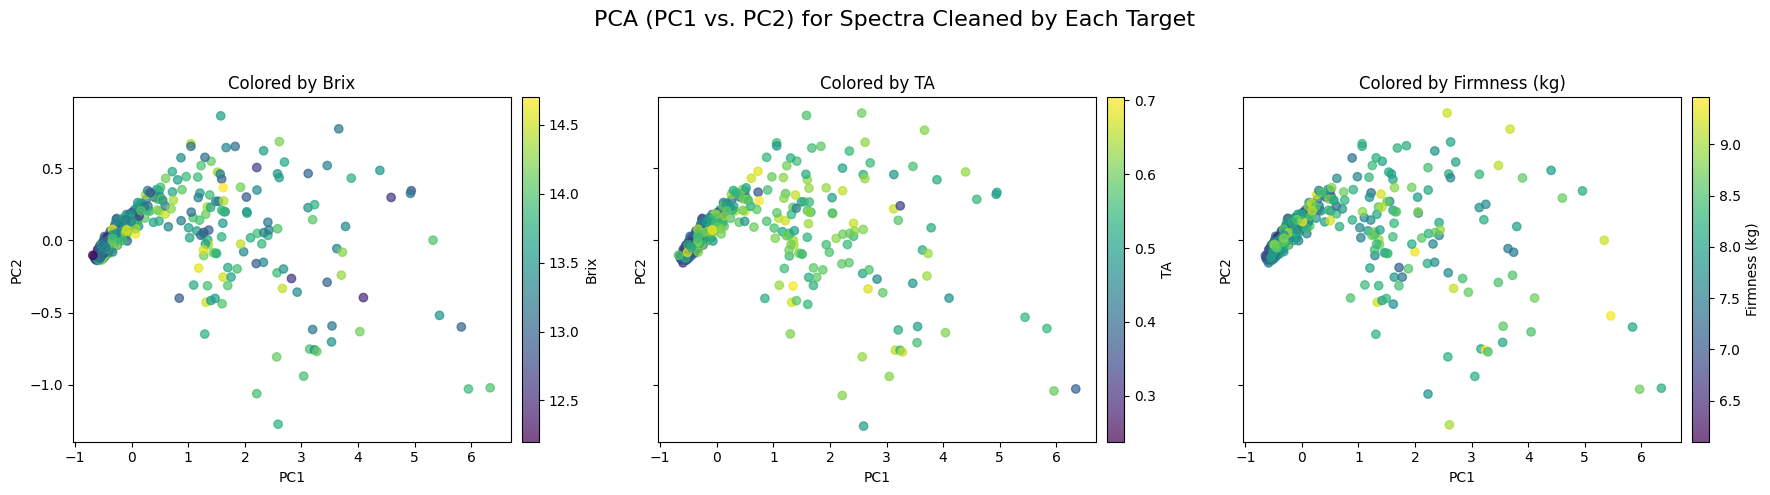

In [8]:
# %% [markdown]
# # Combined PCA Plots for All Three Targets
# This cell computes PCA separately for each target‐cleaned dataset and plots
# all three PC1 vs. PC2 scatter plots side by side for easy comparison.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

# Load and aggregate once
df = pd.read_csv('Assignment_DataScientist_20250502.csv')
spectral_cols = df.columns[:112]
targets       = ['Brix', 'TA', 'Firmness (kg)']
group_cols    = ['Experiment', 'Fruit nr']

df_agg = df.groupby(group_cols).agg(
    {**{col: 'mean' for col in spectral_cols},
     **{tgt: 'mean' for tgt in targets}}
).reset_index()

# Prepare subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
fig.suptitle('PCA (PC1 vs. PC2) for Spectra Cleaned by Each Target', fontsize=16)

for ax, tgt in zip(axes, targets):
    # Copy and clean per-target
    df_temp = df_agg.dropna(subset=list(spectral_cols) + [tgt]).copy()
    z = np.abs(stats.zscore(df_temp[tgt]))
    df_temp = df_temp[z < 3]
    
    # PCA
    X = df_temp[spectral_cols].values
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot
    sc = ax.scatter(
        X_pca[:, 0], X_pca[:, 1],
        c=df_temp[tgt],
        cmap='viridis',
        alpha=0.7
    )
    ax.set_title(f'Colored by {tgt}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

    # add colorbar to each subplot
    cbar = fig.colorbar(sc, ax=ax, pad=0.02)
    cbar.set_label(tgt)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
